## Pytorch Introduction with Simple Linear Regression
Suppose you want to learn a model that when given an input value `x`, predicts an output `y`.
You have a bunch of data that show input/output relationship, for e.g:
```
x = 1.0, y = 3.0
x = 2.0, y = 5.0
x = 3.0, y = 7.0
x = 4.0, y = 9.0
```
Now, we need to learn a model from these input/output data---called `training data`.

Now, for this, we assume that the output `y` is a linear combination of the input `x`. i.e., `y = wx + b`. Given this `w (weight)` and `b (biases)`, we can compute y.

How do we learn these parameters `w` and `b` for the model?

In [ ]:
pip install torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 62.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 57.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

# We want to do it using PyTorch: but incrementally

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [ ]:
# Input data
X = torch.tensor([[1.0], [2.0], [3.0], [4.0]])
y = torch.tensor([[3.0], [5.0], [7.0], [9.0]])

# Since, the equation is in the form: y = wx + b, we want to learn w and b so
# that we can feed in x to get y.
# Let's initialize weights (w) and biases (b)

w = torch.tensor([[0.0]])
b = torch.tensor([[0.0]])

We want to learn the `parameters (w and b)`, and we're going to try `1000 times` (epochs) to update the parameters by the factor of `0.01`times the "error".

Now, this error is the loss function, which measures how further we are from the actual.

For the purpose of linear regression (linear combination of the input), we use Mean Squared Loss (MSE):

MSE = 1/n * Σ(y - y_pred) ** 2


Steps to train: \\
1) We predict output (y_pred) using current w and b. \\
2) We compute the loss. (We measure how wrong we are.)\\
3) We compute the 'gradients' of the loss with respect to `w` and `b`. (We measure how changing `w` and `b` changes the 'wrongness'.)  \\

Gradients represents the slope or rate of change of a function with respect to its input variables.  In this, we compute the gradient of loss wrt `w` and `b` to know how loss changes when we change those parameters.

To compute the gradient of the MSE loss wrt `w`, we take partial derivative of MSE wrt `w`. i.e.,

grad_y_pred = - 2 * (y - y_pred) * ( 1 / n)

grad_w = X^T * grad_y_pred

grad_b = grad_y_pred.sum()

[Remember: Gradient also gives you the direction of steepest increase of the function. So to minimize the loss, you have to move in the opposite direction of the gradient]

4) we change `w` and `b` such that the prediction would go in the opposite direction of the gradient.

w = w - grad_w * learning_rate \\
b = b - grad_b * learning_rate \\


In [ ]:
epochs = 1000 # how many times we try to train.
learning_rate = 0.01 # how fast we learn, proportional to the "error".

# Lets run the training
for epoch in range(epochs):
  y_pred = X @ w + b
  loss = ((y - y_pred) ** 2).mean()

  # compute gradients
  grad_y_pred = - 2 * (y - y_pred) * ( 1 / y.size(0))
  grad_w = X.T @ grad_y_pred
  grad_b = grad_y_pred.sum()

  # Update weights
  w -= learning_rate * grad_w
  b -= learning_rate * grad_b

  if epoch % 100 == 0:
        print(f'Epoch {epoch}: Loss = {loss.item():.4f}, w = {w.item():.4f}, b = {b.item():.4f}')


Epoch 0: Loss = 41.0000, w = 0.3500, b = 0.1200
Epoch 100: Loss = 0.0075, w = 2.0720, b = 0.7883
Epoch 200: Loss = 0.0041, w = 2.0534, b = 0.8431
Epoch 300: Loss = 0.0023, w = 2.0395, b = 0.8838
Epoch 400: Loss = 0.0012, w = 2.0293, b = 0.9139
Epoch 500: Loss = 0.0007, w = 2.0217, b = 0.9362
Epoch 600: Loss = 0.0004, w = 2.0161, b = 0.9527
Epoch 700: Loss = 0.0002, w = 2.0119, b = 0.9650
Epoch 800: Loss = 0.0001, w = 2.0088, b = 0.9740
Epoch 900: Loss = 0.0001, w = 2.0065, b = 0.9808


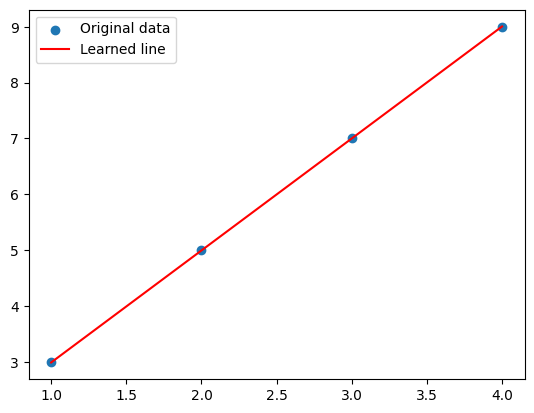

In [ ]:
# Plot
plt.scatter(X.numpy(), y.numpy(), label="Original data")
plt.plot(X.numpy(), (X @ w + b).detach().numpy(), label="Learned line", color="r")
plt.legend()
plt.show()

In [ ]:
# Now that we have `w` and `b`, if we want to predict for any x (say, 2.5),
# outside of the training data, we can get the value.
x_test = torch.tensor([[2.5]])
print(x_test @ w + b)

tensor([[5.9979]])


# Autograd feature of PyTorch

Previously, we computed gradient of loss by doing partial derivative of `MSE loss` for both `w` and `b`.
We don't need to do all those computation by hand if we're using PyTorch.

Let's assume we have a function `y = x^2 + x`

We want to see how much of `y` changes if `x` changes using pytorch.

In [ ]:
# For pytorch to compute gradient, we have to add requires_grad=True
# to variables we want to compute gradient for. PyTorch will then track
# computation graph for that variable.
x = torch.tensor(2.0, requires_grad=True)

y = x**2 + x

# Compute gradient (backward pass)
y.backward()

print(f"Value of y: {y.item()}")
print(f"Gradient dy/dx at x={x.item()}: {x.grad.item()}")

Value of y: 6.0
Gradient dy/dx at x=2.0: 5.0


We can see that it's equal to true (hand computed) value.

If we take the derivative of y wrt x, we get 2x + 1. At, x = 2.0, dy/dx = 5.

> This tells us: if you slightly increase x, the output y will increase approximately 5 times that change in x.

Now, we computed the gradient to be `5` at `x = 2.0` using pytorch's autograd.

## Let's use this autograd in our previous linear regression example

In [ ]:
# Training data
X = torch.tensor([[1.], [2.], [3.], [4.]])
y = torch.tensor([[3.], [5.], [7.], [9.]])

# Initialize parameters with autograd enabled
w = torch.tensor([[0.0]], requires_grad=True)
b = torch.tensor([[0.0]], requires_grad=True)

learning_rate = 0.01
epochs = 1000

for epoch in range(epochs):
  y_pred = X @ w + b
  loss = ((y - y_pred) ** 2).mean()

  loss.backward()

  # turn off gradient tracking
  # because w = w - lr * (some_value) might also get tracked
  with torch.no_grad():
    w -= learning_rate * w.grad
    b -= learning_rate * b.grad

  # Pytorch automatically does gradient accumulation (for the purposes of having
  # to deal with multiple loss), so we have to make sure to zero out gradients.
  w.grad.zero_()
  b.grad.zero_()

  if epoch % 100 == 0:
    print(f'Epoch {epoch}: Loss = {loss.item():.4f}, w = {w.item():.4f}, b = {b.item():.4f}')

Epoch 0: Loss = 41.0000, w = 0.3500, b = 0.1200
Epoch 100: Loss = 0.0075, w = 2.0720, b = 0.7883
Epoch 200: Loss = 0.0041, w = 2.0534, b = 0.8431
Epoch 300: Loss = 0.0023, w = 2.0395, b = 0.8838
Epoch 400: Loss = 0.0012, w = 2.0293, b = 0.9139
Epoch 500: Loss = 0.0007, w = 2.0217, b = 0.9362
Epoch 600: Loss = 0.0004, w = 2.0161, b = 0.9527
Epoch 700: Loss = 0.0002, w = 2.0119, b = 0.9650
Epoch 800: Loss = 0.0001, w = 2.0088, b = 0.9740
Epoch 900: Loss = 0.0001, w = 2.0065, b = 0.9808


## Let's move on to implement everything in PyTorch

### Defining the model:
[torch.nn](https://docs.pytorch.org/docs/stable/nn.html) provides basic building blocks for the neural network. We're going to use `nn.Linear` to define a linear model.

```python
import torch.nn as nn
model = nn.Linear(in_features=1, out_features=1)
```
By doing this, PyTorch automatically initializes weights (*w*)---shape = (1,1),  and biases (*b*)---shape=(1,); and it comes with built-in gradient tracking.
It is equivalent to doing:
```python
w = torch.tensor([[0.0]], requires_grad=True)
b = torch.tensor([[0.0]], requires_grad=True)
```

### Defining Loss and Optimizer
Previously, we defined loss as an MSE loss, and we used an optimizer (i.e, update weights and biases after gradient is computed). Here, we'll do that but cleaner, and using pytorch built-in capabilities.
```python
import torch.optim as optim

criterion = nn.MSELoss() # loss (normally written as criterion)
optimizer = optim.SGD(model.parameters(), lr=0.01) # Stochastic Gradient Descent (what we used before)
```

`model.parameters()` gives 'access' to updating *w* and *b* for the model that we defined above.
`optimizer.step()` updates the parameters *w* and *b*, and `optimizer.zero_grad()` clears the gradient (same as `w.grad.zero_())` but for all parameters of model (*w* and *b*).


With this, let's train the model.


In [ ]:
import torch.nn as nn
import torch.optim as optim

# Training data
X = torch.tensor([[1.], [2.], [3.], [4.]])
y = torch.tensor([[3.], [5.], [7.], [9.]])

model = nn.Linear(in_features=1, out_features=1)  # y = wx + b

criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

epochs = 1000
for epoch in range(epochs):
  y_pred = model(X)
  loss = criterion(y_pred, y)
  optimizer.zero_grad() # always zero grad before backprop (we used to do after)
  loss.backward()
  optimizer.step()

  if epoch % 100 == 0:
    w = model.weight.item()
    b = model.bias.item()
    print(f"Epoch {epoch}: Loss = {loss.item():.4f}, w = {w:.4f}, b = {b:.4f}")

Epoch 0: Loss = 39.4788, w = 0.0699, b = 1.0549
Epoch 100: Loss = 0.0375, w = 1.8393, b = 1.4724
Epoch 200: Loss = 0.0206, w = 1.8809, b = 1.3500
Epoch 300: Loss = 0.0113, w = 1.9118, b = 1.2594
Epoch 400: Loss = 0.0062, w = 1.9346, b = 1.1922
Epoch 500: Loss = 0.0034, w = 1.9516, b = 1.1424
Epoch 600: Loss = 0.0019, w = 1.9641, b = 1.1055
Epoch 700: Loss = 0.0010, w = 1.9734, b = 1.0782
Epoch 800: Loss = 0.0006, w = 1.9803, b = 1.0579
Epoch 900: Loss = 0.0003, w = 1.9854, b = 1.0429


In [ ]:
# Prediction
x_test = torch.tensor([[2.5]])
y_test_pred = model(x_test)
print(f"\nPrediction for x=2.5: {y_test_pred.item():.4f}")


Prediction for x=2.5: 6.0048


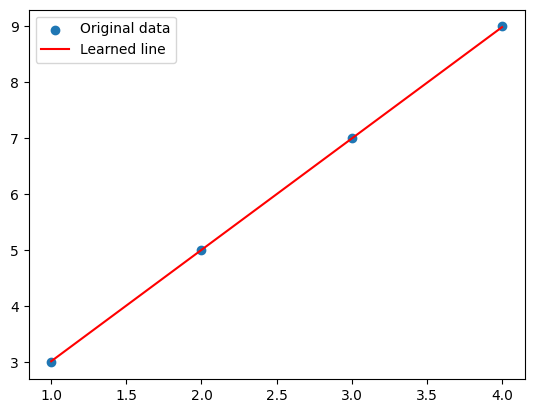

In [ ]:
plt.scatter(X.numpy(), y.numpy(), label="Original data")
plt.plot(X.numpy(), model(X).detach().numpy(), label="Learned line", color='r')
plt.legend()
plt.show()

## Simple Neural Network Classifier

Here, we're going to build a simple neural network classifier for hand-written digits (0-9) from the MNIST dataset.

### First we load the data

In [ ]:
import torchvision
import torchvision.transforms as transforms

# Transform: convert image to tensor and normalize
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)) # mean and std of MNIST
])

# Download datasets
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform)

# Create a dataloader
train_dataloader = torch.utils.data.DataLoader(dataset=train_dataset,
                                               batch_size=64,
                                               shuffle=True)
test_dataloader = torch.utils.data.DataLoader(dataset=test_dataset,
                                              batch_size=64,
                                              shuffle=False)

100%|██████████| 9.91M/9.91M [00:00<00:00, 33.8MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.01MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 9.76MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 7.06MB/s]


### Then we define the neural network

In [ ]:
import torch.nn.functional as F

class FeedForwardNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(28*28, 128) # Input layer
    self.fc2 = nn.Linear(128, 64) # Hidden layer
    self.fc3 = nn.Linear(64, 10) # Output layer (10 digits)

  def forward(self, x):
    x = x.view(-1, 28*28) # flatten
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

### And finally the training code (just like before)

In [ ]:
def train_model(model, criterion, optimizer, epochs=5):
  # Training loop
  for epoch in range(epochs):
    total_loss = 0
    for images, labels in train_dataloader:
      outputs = model(images)
      loss = criterion(outputs, labels)

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      total_loss += loss.item()
    print(f'Epoch {epoch + 1}, Loss: {total_loss:.4f}')

model = FeedForwardNN()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
epochs = 5
train_model(model, criterion, optimizer, epochs)

Epoch 1, Loss: 255.3115
Epoch 2, Loss: 108.3161
Epoch 3, Loss: 76.4739
Epoch 4, Loss: 57.8894
Epoch 5, Loss: 45.2969


# Evaluation of the model

In [ ]:
def evaluate_accuracy(model):
  correct = 0
  total = 0
  model.eval()
  with torch.no_grad():
    for images, labels in test_dataloader:
      outputs = model(images)
      _, predicted = torch.max(outputs.data, dim=1)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()

  print(f'Test Accuracy: {100 * correct / total:.2f}%')

evaluate_accuracy(model)

Test Accuracy: 97.41%


## Simple CNN for MNIST Classification

A good blog for CNN is [here.](https://www.tomasbeuzen.com/deep-learning-with-pytorch/chapters/chapter5_cnns-pt1.html)

In [ ]:
class SimpleCNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(1, 16, kernel_size=3, padding=1)
    self.pool = nn.MaxPool2d(2, 2)
    self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
    self.fc1 = nn.Linear(32 * 7 * 7, 128)
    self.fc2 = nn.Linear(128, 10)

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = x.view(-1, 32 * 7 * 7)
    x = F.relu(self.fc1(x))
    x = self.fc2(x)
    return x


model = SimpleCNN()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
epochs = 5
train_model(model, criterion, optimizer, epochs)

# Evaluate accuracy
evaluate_accuracy(model)

Epoch 1, Loss: 153.1921
Epoch 2, Loss: 46.2319
Epoch 3, Loss: 31.9992
Epoch 4, Loss: 24.1275
Epoch 5, Loss: 18.5496
Test Accuracy: 98.84%
